In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [2]:
def get_product_info(c):
    for name in products.find_all('a',class_='absolute-link product-link'):
        Category.append(c)
        Name.append(name.get('title'))

    for price in products.find_all('div',class_='product-price-top'):
        original_price=''
        if price.find(class_='price'):
            original_price=price.find(class_='price').text
            Price.append(float(original_price.replace('\nAU$','').replace('\n','')))
        
        elif price.find(class_='price-olp'):
            original_price=price.find(class_='price-olp').text
            Price.append(float(original_price.replace('\nAU$','').replace('\n',''))) 
        
        else:
            Price.append(np.nan)

    for rating in products.find_all('div',class_='product-inner product-inner-wide'):
        if rating.find('a',class_='rating-count'):
            Rating.append(float(rating.find('a',class_='rating-count').get('title').split()[0].split('/')[0]))
            Reviews.append(int(rating.find('a',class_='rating-count').get('title').split()[2]))
        else:
            Rating.append(np.nan)
            Reviews.append(np.nan)
    

In [3]:
Price = []
Name = []
Rating = []
Reviews =[]
Category = []
cate = ['supplements','sports-nutrition', 'bath-personal-care', 'beauty','grocery', 'baby-kids','pets','healthy-home']

In [4]:
for c in cate:
    for page in range(1,36):
        if page >3 and c =='pets':
            continue;
        url = "https://au.iherb.com/c/{}?p={}"
        page_url = url.format(c,page)
        print(page_url)
        response = requests.get(page_url)
        Cpage = response.text
        soup = BeautifulSoup(Cpage, "lxml")
        products = soup.find('div',class_='products clearfix')
        get_product_info(c)

https://au.iherb.com/c/supplements?p=1
https://au.iherb.com/c/supplements?p=2
https://au.iherb.com/c/supplements?p=3
https://au.iherb.com/c/supplements?p=4
https://au.iherb.com/c/supplements?p=5
https://au.iherb.com/c/supplements?p=6
https://au.iherb.com/c/supplements?p=7
https://au.iherb.com/c/supplements?p=8
https://au.iherb.com/c/supplements?p=9
https://au.iherb.com/c/supplements?p=10
https://au.iherb.com/c/supplements?p=11
https://au.iherb.com/c/supplements?p=12
https://au.iherb.com/c/supplements?p=13
https://au.iherb.com/c/supplements?p=14
https://au.iherb.com/c/supplements?p=15
https://au.iherb.com/c/supplements?p=16
https://au.iherb.com/c/supplements?p=17
https://au.iherb.com/c/supplements?p=18
https://au.iherb.com/c/supplements?p=19
https://au.iherb.com/c/supplements?p=20
https://au.iherb.com/c/supplements?p=21
https://au.iherb.com/c/supplements?p=22
https://au.iherb.com/c/supplements?p=23
https://au.iherb.com/c/supplements?p=24
https://au.iherb.com/c/supplements?p=25
https://a

In [7]:
len(Name)

5948

In [8]:
len(Rating)

5948

In [9]:
len(Reviews)

5948

In [10]:
len(Price)

5948

In [11]:
len(Category)

5948

In [13]:
Size = [] 
cn=0
c=0
for n in Name:
    m = re.search('([\d.]+)\s+(mg|g|kg)', n)
    if m is None:
        Size.append(np.nan)
        cn +=1
    else:
        Size.append(m.group(0))
        c+=1

In [14]:
Size

[nan,
 '000 mg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '206 g',
 nan,
 nan,
 '500 mg',
 nan,
 '250 mg',
 nan,
 '36 mg',
 nan,
 nan,
 '100 mg',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '100 mg',
 nan,
 nan,
 nan,
 nan,
 '50 mg',
 '464 g',
 '300 mg',
 '50 mg',
 '500 mg',
 nan,
 '000 mg',
 nan,
 '20 mg',
 '454 g',
 '100 mg',
 nan,
 nan,
 nan,
 '500 mg',
 '20 mg',
 '500 mg',
 '000 mg',
 '000 mg',
 '950 mg',
 nan,
 nan,
 '000 mg',
 '8.5 g',
 nan,
 nan,
 '50 mg',
 nan,
 '120 mg',
 '50 mg',
 '500 mg',
 nan,
 '250 mg',
 nan,
 nan,
 '595 mg',
 nan,
 nan,
 '500 mg',
 nan,
 '500 mg',
 nan,
 '200 mg',
 nan,
 nan,
 '300 mg',
 nan,
 nan,
 '250 mg',
 nan,
 nan,
 nan,
 nan,
 '454 g',
 nan,
 nan,
 '500 mg',
 nan,
 nan,
 nan,
 '500 mg',
 '50 mg',
 nan,
 nan,
 '120 mg',
 '200 mg',
 '567 g',
 nan,
 '100 mg',
 nan,
 nan,
 '20 mg',
 nan,
 '454 g',
 '500 mg',
 nan,
 '36 mg',
 nan,
 nan,
 '50 mg',
 nan,
 nan,
 nan,
 '100 mg',
 nan,
 nan,
 '000 mg',
 nan,
 '2.27 kg',
 '100 mg',
 nan,
 '8.5 g

In [15]:
print(c,cn)

2643 3305


In [16]:
for idx, s in enumerate(Size):
    if 'kg' in str(s):
        Size[idx] = float(s.replace('kg',''))*1000.0
    elif 'mg' in str(s):
        Size[idx] = float(s.replace('mg',''))/1000.0
    elif 'g' in str(s):
        Size[idx] = float(s.replace('g',''))

In [17]:
Size

[nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 206.0,
 nan,
 nan,
 0.5,
 nan,
 0.25,
 nan,
 0.036,
 nan,
 nan,
 0.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1,
 nan,
 nan,
 nan,
 nan,
 0.05,
 464.0,
 0.3,
 0.05,
 0.5,
 nan,
 0.0,
 nan,
 0.02,
 454.0,
 0.1,
 nan,
 nan,
 nan,
 0.5,
 0.02,
 0.5,
 0.0,
 0.0,
 0.95,
 nan,
 nan,
 0.0,
 8.5,
 nan,
 nan,
 0.05,
 nan,
 0.12,
 0.05,
 0.5,
 nan,
 0.25,
 nan,
 nan,
 0.595,
 nan,
 nan,
 0.5,
 nan,
 0.5,
 nan,
 0.2,
 nan,
 nan,
 0.3,
 nan,
 nan,
 0.25,
 nan,
 nan,
 nan,
 nan,
 454.0,
 nan,
 nan,
 0.5,
 nan,
 nan,
 nan,
 0.5,
 0.05,
 nan,
 nan,
 0.12,
 0.2,
 567.0,
 nan,
 0.1,
 nan,
 nan,
 0.02,
 nan,
 454.0,
 0.5,
 nan,
 0.036,
 nan,
 nan,
 0.05,
 nan,
 nan,
 nan,
 0.1,
 nan,
 nan,
 0.0,
 nan,
 2270.0,
 0.1,
 nan,
 8.5,
 nan,
 nan,
 nan,
 0.5,
 0.15,
 nan,
 454.0,
 0.1,
 0.5,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 0.003,
 nan,
 nan,
 0.0,
 0.5,
 nan,
 nan,
 0.03,
 nan,
 0.01,
 0.015,
 nan,
 nan,
 0.0,
 0.4,
 0.1,
 nan,
 200.0,
 0.1,

In [18]:
tuples = list(zip(Name,Price,Reviews,Size,Category,Rating))
df = pd.DataFrame(tuples, columns=['Name','Price','Reviews','Size','Category','Rating'])
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Omega-3, Premium Fi...",10.89,160947.0,NaN,supplements,4.8
1,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.0,supplements,4.8
2,"California Gold Nutrition, Vitamin D3, 125 mcg...",14.56,80685.0,NaN,supplements,4.9
3,"California Gold Nutrition, LactoBif Probiotics...",31.11,41690.0,NaN,supplements,4.6
4,"California Gold Nutrition, Vitamin D3, 125 mcg...",6.53,80685.0,NaN,supplements,4.9
...,...,...,...,...,...,...
5943,"Therapy Clean, Granite & Stone, Cleaner & Poli...",15.48,NaN,NaN,healthy-home,NaN
5944,"Therapy Clean, Glass Cooktop, Cleaner & Polish...",15.48,NaN,NaN,healthy-home,NaN
5945,"Now Foods, Certified Organic Lavender Roll-On,...",8.85,169.0,NaN,healthy-home,4.5
5946,"Now Foods, Essential Oils, Head Relief Roll-On...",8.85,393.0,NaN,healthy-home,4.3


In [19]:
df.to_csv('iHerb_products.csv',index=False)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

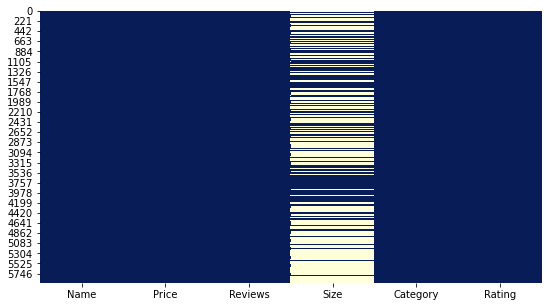

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

In [22]:
df.dropna(inplace=True)

In [23]:
df.reset_index(drop=True,inplace=True)

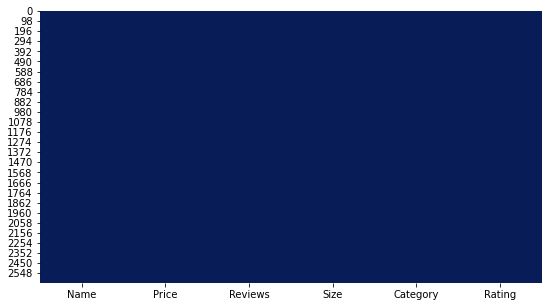

In [24]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

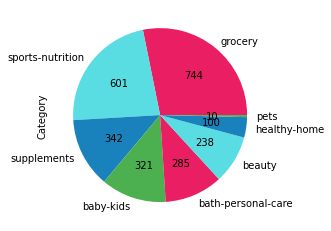

In [25]:
states = df['Category'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors )

In [26]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8
...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 6 columns):
Name        2641 non-null object
Price       2641 non-null float64
Reviews     2641 non-null float64
Size        2641 non-null float64
Category    2641 non-null object
Rating      2641 non-null float64
dtypes: float64(4), object(2)
memory usage: 123.9+ KB


In [28]:
df_ = df['Category']

In [29]:
df_

0        supplements
1        supplements
2        supplements
3        supplements
4        supplements
            ...     
2636    healthy-home
2637    healthy-home
2638    healthy-home
2639    healthy-home
2640    healthy-home
Name: Category, Length: 2641, dtype: object

In [30]:
set(df_)

{'baby-kids',
 'bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements'}

In [31]:
df_=pd.get_dummies(df_, drop_first=True,)

In [32]:
df_.shape

(2641, 7)

In [33]:
df_

,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2636,0,0,0,1,0,0,0
2637,0,0,0,1,0,0,0
2638,0,0,0,1,0,0,0
2639,0,0,0,1,0,0,0


In [34]:
#df.drop('Category',axis=1, inplace=True)

In [35]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8
...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5


In [36]:
iHerb=pd.concat([df, df_],axis=1)

In [37]:
iHerb.to_csv('iHerb.csv',index=False)

In [38]:
iHerb2=iHerb.copy()

In [39]:
iHerb2

,Name,Price,Reviews,Size,Category,Rating,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8,0,0,0,0,0,0,1
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7,0,0,0,0,0,0,1
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8,0,0,0,0,0,0,1
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6,0,0,0,0,0,0,1
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5,0,0,0,1,0,0,0
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4,0,0,0,1,0,0,0
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3,0,0,0,1,0,0,0
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5,0,0,0,1,0,0,0


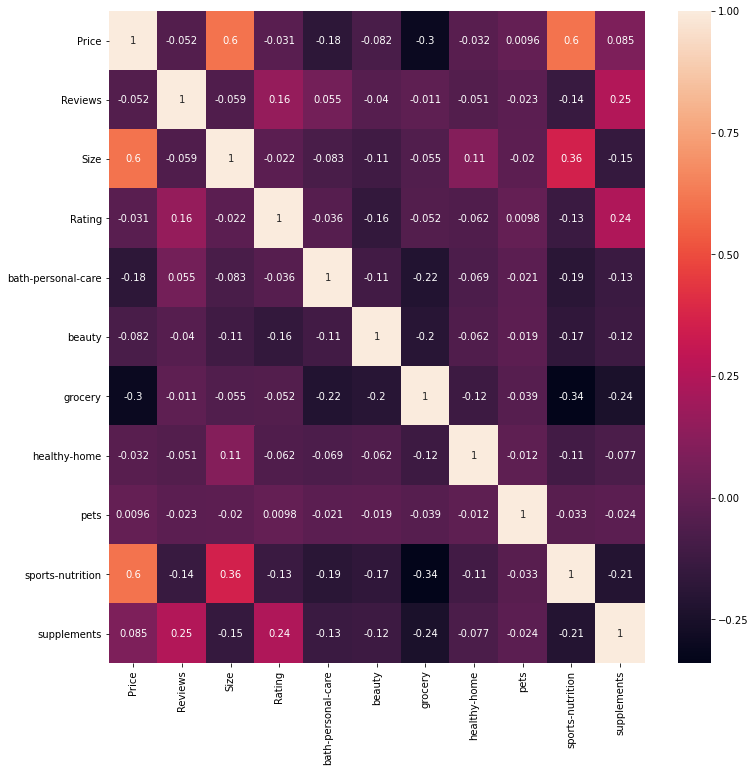

In [40]:
corr = iHerb.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)

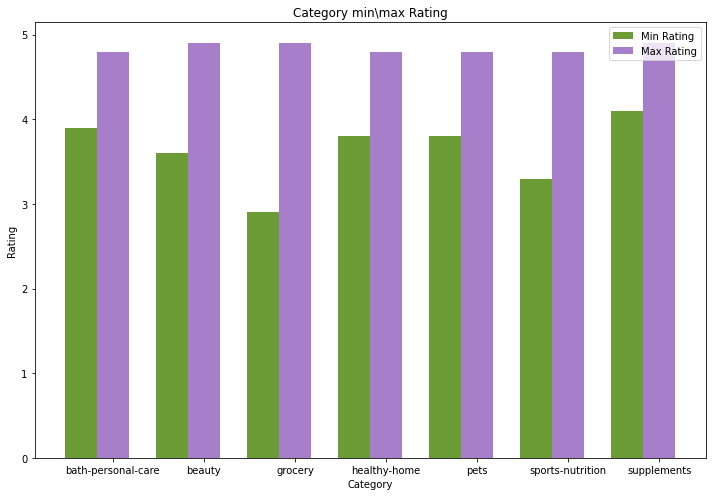

In [41]:
Categories=['bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements']
Product_min_Rating=[]
Product_max_Rating=[]

for cate in Categories:
    Product_max_Rating.append(max(iHerb[iHerb['Category']== cate]['Rating']))
    Product_min_Rating.append(min(iHerb[iHerb['Category']== cate]['Rating']))
    
months = iHerb['Category']
n_groups = 7
means_frank = Product_min_Rating
means_guido = Product_max_Rating

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='#478402',
label='Min Rating')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='#915ebc',
label='Max Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category min\max Rating')


plt.xticks(index + bar_width,Categories)

plt.legend()
plt.tight_layout()
plt.show()

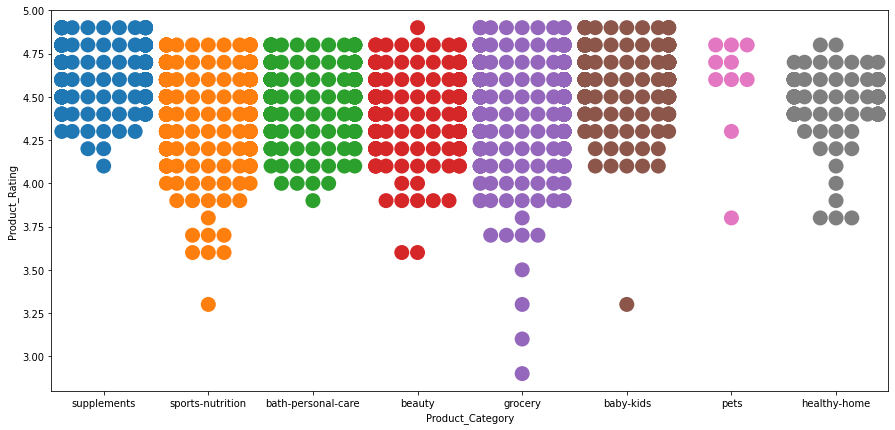

In [42]:
Product_Category=iHerb['Category']
Product_Rating=iHerb['Rating']
    
newData = pd.DataFrame({
    'Product_Category':Product_Category,
    'Product_Rating':Product_Rating
})
fig, ax = plt.subplots(figsize=(15,7))
sns.swarmplot(x="Product_Category", y="Product_Rating", data=newData,size=15)


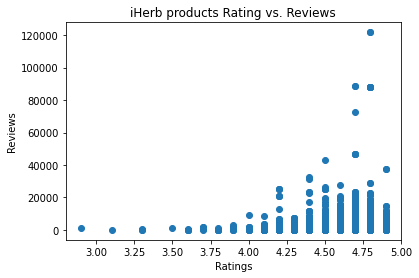

In [43]:
plt.scatter(iHerb['Rating'], iHerb['Reviews'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

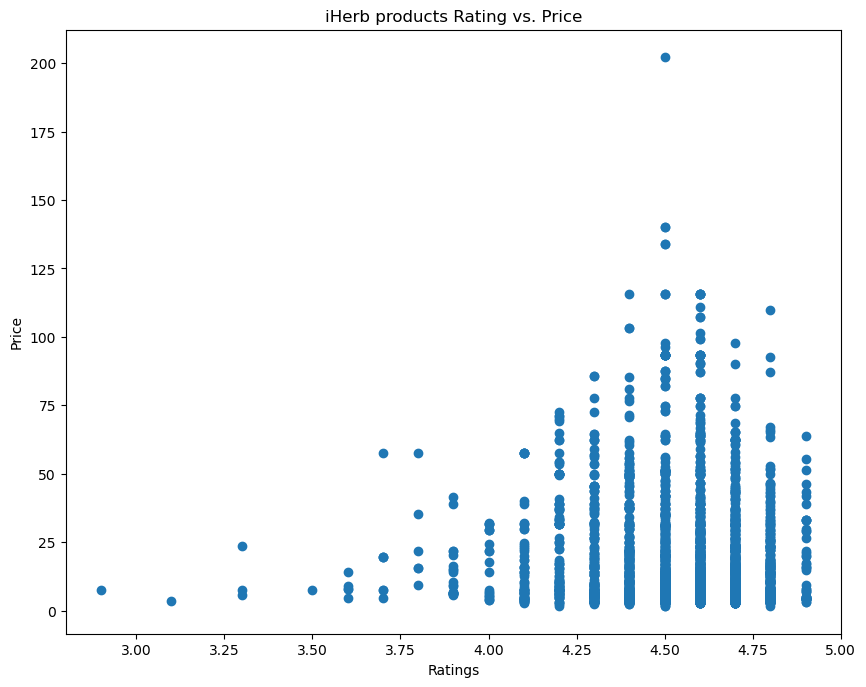

In [44]:
plt.scatter(iHerb['Rating'], iHerb['Price'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

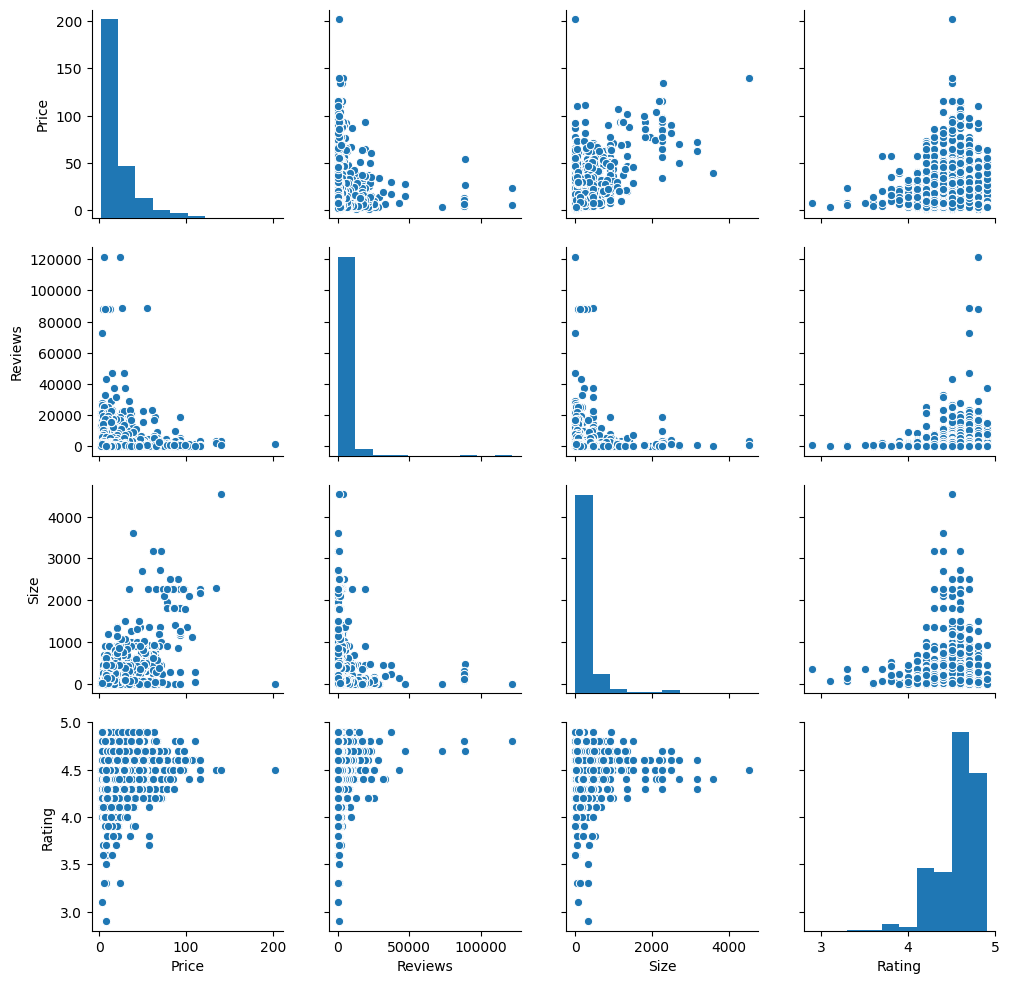

In [45]:
sns.pairplot(df)

In [46]:
df.describe()

,Price,Reviews,Size,Rating
count,2641.000000,2641.000000,2641.000000,2641.000000
mean,19.519345,2972.300644,219.787373,4.536350
std,20.446082,7411.845875,420.341065,0.212801
min,1.550000,2.000000,0.000000,2.900000
25%,6.220000,442.000000,22.000000,4.400000
50%,11.080000,1068.000000,80.000000,4.600000
75%,25.400000,2689.000000,227.000000,4.700000
max,202.200000,121799.000000,4540.000000,4.900000


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Rating', 'Reviews', 'Size', 
       'bathAndPersonalAndCare', 'beauty', 'grocery', 'healthyHome', 'pets',
       'sportsAndNutrition', 'supplements']], iHerb[['Price']], test_size=0.3, random_state=42)
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)

Training Data has (1848, 10)
Testing Data has (793, 10)


In [68]:
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("training accuracy: ",r2_score(y_train,lr.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lr.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,lr.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,lr.predict(X_test)) )

training accuracy:  0.5696640032918073
training error:  0.43033599670819267
testing accuracy:  0.6977738878683559
testing error:  0.3022261121316441


In [69]:
lr.coef_

array([[-1.42037452e+00, -4.65310407e-05,  2.26978030e-02,
        -1.10253575e+00,  6.21029950e+00, -2.09620086e+00,
        -6.39399094e-01,  1.24590386e+01,  2.35861149e+01,
         1.68331287e+01]])

In [51]:
lr.intercept_

array([4.64785941])

In [52]:
error_1*100

4.139918434388972

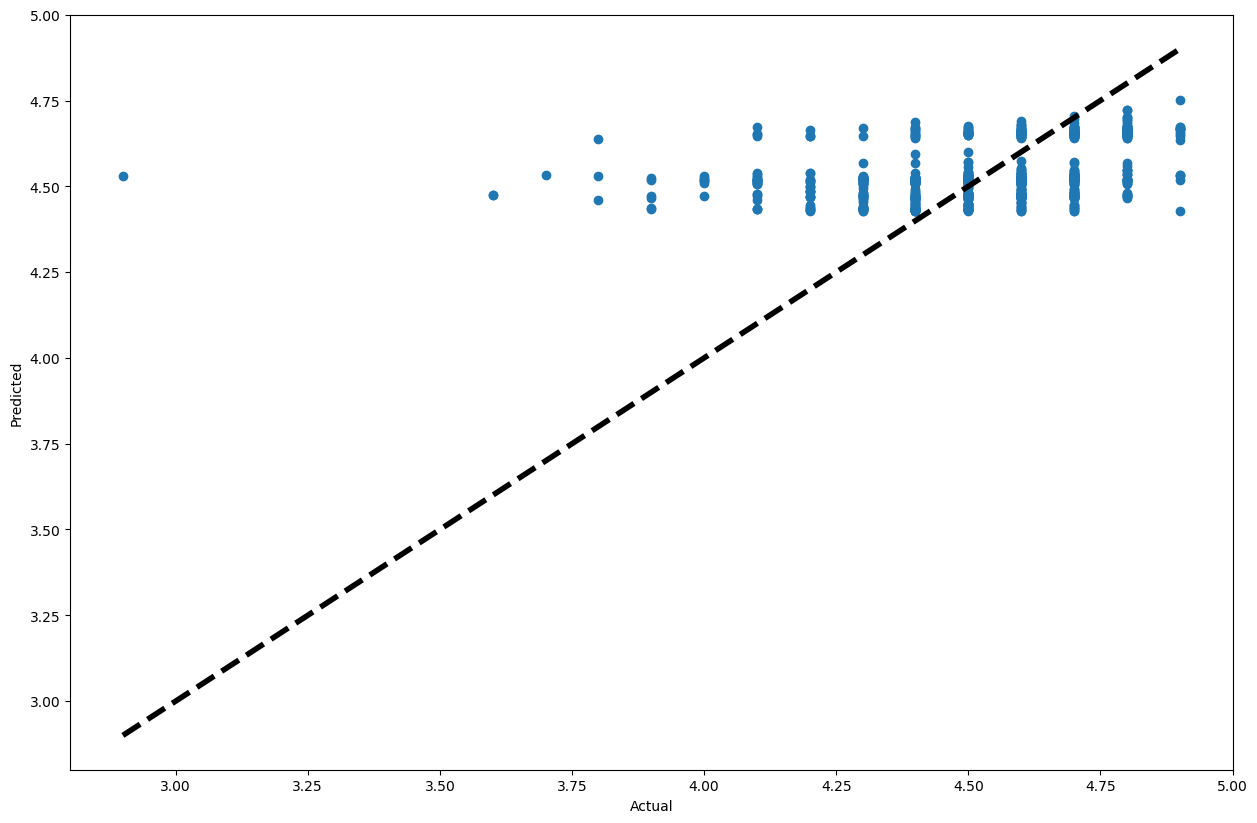

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test, pred_1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()

In [54]:
iHerb.columns

Index(['Name', 'Price', 'Reviews', 'Size', 'Category', 'Rating',
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements'],
      dtype='object')

In [55]:
iHerb.rename(columns={'bath-personal-care': 'bathAndPersonalAndCare', 'healthy-home': 'healthyHome', 'sports-nutrition':'sportsAndNutrition'}, inplace=True)

In [56]:
# fit model with target as housing price index
import statsmodels.api as sm

housing_model = sm.OLS(y_train, X_train, data=df)

results = housing_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              1330.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                        0.00
Time:                        11:50:14   Log-Likelihood:                         -3471.6
No. Observations:                1848   AIC:                                      6963.
Df Residuals:                    1838   BIC:                                      7018.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Price                  0.0214      0.003      7.930      0.000       0.016       0.027
Reviews             1.936e-05   4.54e-06      4.265      0.000    1.05e-05    2.83e-05
Size               -9.549e-05      0.000     -0.806      0.420      -0.000       0.000
bath-personal-care     4.2529      0.116     36.516      0.000       4.025       4.481
beauty                 4.0752      0.131     31.184      0.000       3.819       4.331
grocery                4.2813      0.074     57.718      0.000       4.136       4.427
healthy-home           4.1139      0.198     20.764      0.000       3.725       4.502
pets                   4.1760      0.603      6.930      0.000       2.994       5.358
sports-nutrition       3.6142      0.123     29.399      0.000       3.373       3.855
supplements            3.9770      0.127     31.318      0.000       3.728       4.226
==============================================================================
Omnibus:                      691.350   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1913.894
Skew:                           2.028   Prob(JB):                         0.00
Kurtosis:                       5.899   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
import statsmodels.formula.api as smf
SMF_model = smf.ols('Price ~ Rating+ Reviews+Size + bathAndPersonalAndCare + beauty + grocery + healthyHome + pets + sportsAndNutrition + supplements', data=iHerb).fit()

In [71]:
print(SMF_model.rsquared)

0.6086905171550053


In [72]:
SMF_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     409.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:01:16   Log-Likelihood:                -10478.
No. Observations:                2641   AIC:                         2.098e+04
Df Residuals:                    2630   BIC:                         2.104e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.1335      5.920      1.881      0.060      -0.475      22.742
Rating                    -0.8332      1.265     -0.659      0.510      -3.314       1.648
Reviews                -5.025e-05   3.52e-05     -1.426      0.154      -0.000    1.88e-05
Size                       0.0232      0.001     35.681      0.000       0.022       0.024
bathAndPersonalAndCare    -0.8608      1.062     -0.811      0.418      -2.943       1.221
beauty                     5.3257      1.132      4.704      0.000       3.106       7.546
grocery                   -1.8369      0.876     -2.097      0.036      -3.555      -0.119
healthyHome               -1.5603      1.506     -1.036      0.300      -4.512       1.392
pets                      13.4001      4.117      3.255      0.001       5.328      21.472
sportsAndNutrition        23.3467      0.952     24.536      0.000      21.481      25.212
supplements               15.8286      1.016     15.577      0.000      13.836      17.821
==============================================================================
Omnibus:                     1561.977   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43495.226
Skew:                           2.290   Prob(JB):                         0.00
Kurtosis:                      22.347   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)
pred_2=rfg.predict(X_test)
score_2=r2_score(y_test,pred_2)
error_2=mean_squared_error(y_test,pred_2)
list_models.append('randomforest')
list_scores.append(score_2)
list_errors.append(error_2)
print("training accuracy: ",r2_score(y_train,rfg.predict(X_train)) )
print("training error: ",1-r2_score(y_train,rfg.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,rfg.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,rfg.predict(X_test)) )

training accuracy:  0.9353331494381096
training error:  0.06466685056189037
testing accuracy:  0.7278445016361723
testing error:  0.2721554983638277
